# Problemática

Realizar a leitura de uma base de dados de nascidos vivos provenientes da base do DataSUS e apresentar dados descritivos para melhor análise dos resultados

# Importar biblioteca

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

# Leitura dos dados

In [2]:
df=pd.read_csv('./sinasc_ro_2019.csv')
df.head(5)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Configurações no dataframe

In [3]:
# Exibir todas as colunas
pd.set_option('max_columns', None)

#Transformar colunas para o snake case
df.columns = df.columns.str.lower()

df.head(5)

,origem,codestab,codmunnasc,locnasc,idademae,estcivmae,escmae,codocupmae,qtdfilvivo,qtdfilmort,codmunres,gestacao,gravidez,parto,consultas,dtnasc,horanasc,sexo,apgar1,apgar5,racacor,peso,idanomal,dtcadastro,codanomal,numerolote,versaosist,dtrecebim,difdata,dtrecoriga,naturalmae,codmunnatu,codufnatu,escmae2010,seriescmae,dtnascmae,racacormae,qtdgestant,qtdpartnor,qtdpartces,idadepai,dtultmenst,semagestac,tpmetestim,consprenat,mesprenat,tpapresent,sttrabpart,stcesparto,tpnascassi,tpfuncresp,tpdocresp,dtdeclarac,escmaeagr1,stdnepidem,stdnnova,codpaisres,tprobson,paridade,kotelchuck,contador,munresstatus,munrestipo,munresnome,munresuf,munreslat,munreslon,munresalt,munresarea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9.0,10.0,Branca,3685,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,17,NaN,811.0,110001.0,11.0,3.0,NaN,20121999.0,1.0,0.0,0.0,0.0,26.0,15052018.0,39.0,8.0,8.0,1.0,1.0,2.0,2.0,1.0,2.0,3.0,19022019.0,12.0,0,1,1,1,0,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8.0,9.0,Branca,3055,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,15,NaN,811.0,110015.0,11.0,3.0,NaN,27041989.0,1.0,1.0,0.0,1.0,24.0,27052018.0,38.0,8.0,10.0,2.0,1.0,2.0,2.0,1.0,5.0,4.0,21022019.0,12.0,0,1,1,5,1,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8.0,10.0,Branca,3460,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,11,NaN,841.0,410045.0,41.0,3.0,NaN,6031981.0,1.0,2.0,1.0,1.0,32.0,18052018.0,40.0,8.0,8.0,1.0,2.0,2.0,2.0,1.0,2.0,4.0,25022019.0,12.0,0,1,1,7,1,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,110037,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9.0,10.0,Parda,2982,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,20,NaN,841.0,410480.0,41.0,5.0,NaN,15071988.0,4.0,0.0,0.0,0.0,24.0,25062018.0,38.0,8.0,6.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,20032019.0,8.0,0,1,1,2,0,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8.0,10.0,Parda,3310,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,17,NaN,811.0,110001.0,11.0,3.0,NaN,12111988.0,4.0,1.0,0.0,1.0,27.0,27062018.0,38.0,8.0,8.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,23032019.0,12.0,0,1,1,5,1,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Configurações gráficas seaborn

In [85]:
sns.set_style(style='darkgrid')

# Boxplot com idade da mãe

<IPython.core.display.Javascript object>


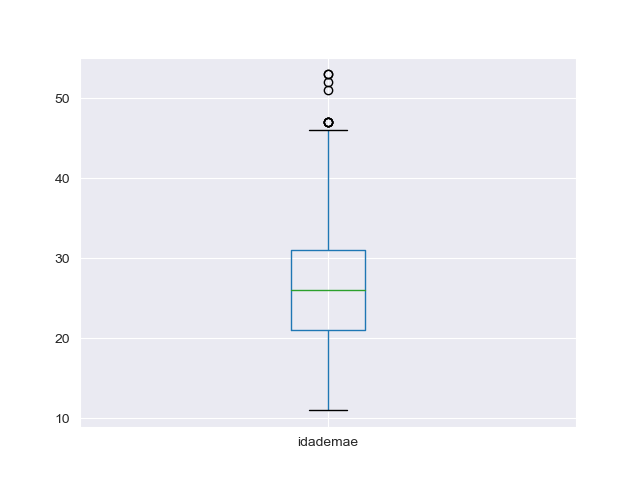

In [86]:
# Boxplot com pandas
plt.figure()
df['idademae'].plot.box()
plt.show()

<IPython.core.display.Javascript object>


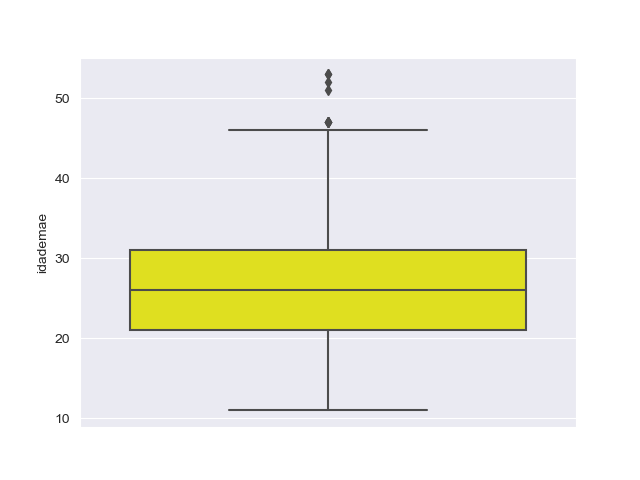

In [87]:
# Boxplot com seaborn
plt.figure()
sns.boxplot(y='idademae', data=df, color='yellow')
plt.show()

# Boxplot do peso do bêbe

<IPython.core.display.Javascript object>


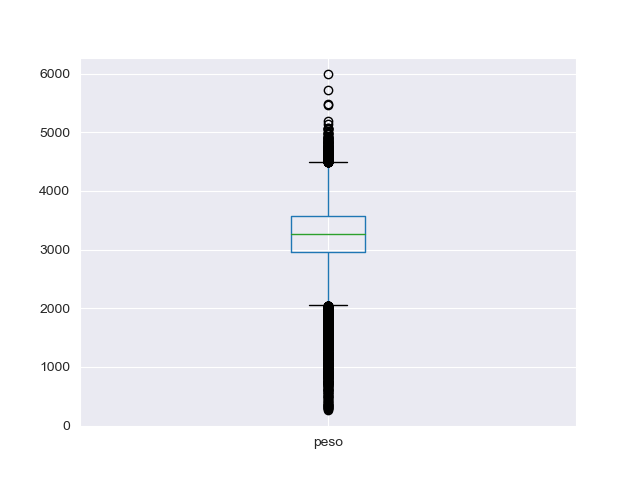

In [88]:
# Boxplot com pandas
plt.figure()
df['peso'].plot.box()
plt.show()

<IPython.core.display.Javascript object>


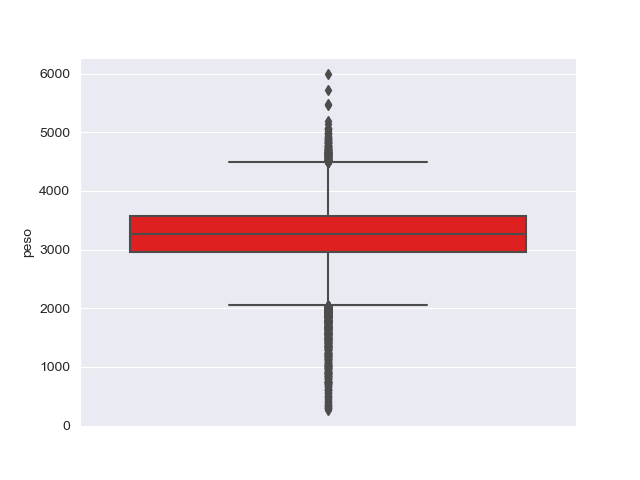

In [89]:
# Boxplot com seaborn
plt.figure()
sns.boxplot(y='peso', data=df, color='red')
plt.show()

# Histograma com idade da mãe

<IPython.core.display.Javascript object>


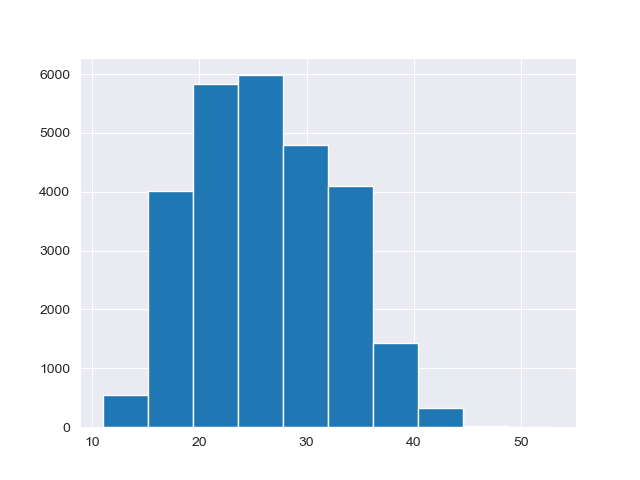

In [90]:
# Histograma com pandas
plt.figure()
df['idademae'].hist()
plt.show()

<IPython.core.display.Javascript object>


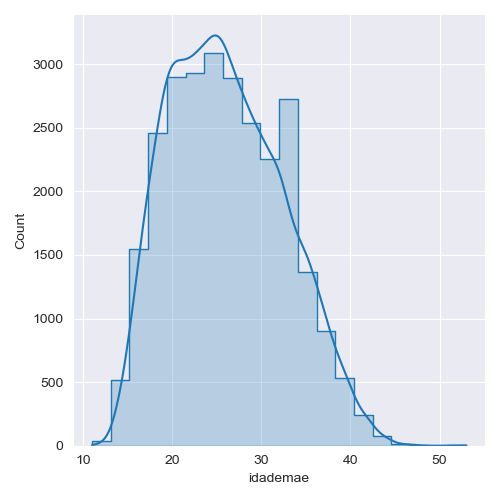

In [91]:
# Histograma com seaborn
sns.displot(data=df,
           x='idademae',
           bins=20,
           alpha=.25,
           element='step',
           kde=True)

# Histograma com peso do bêbe

<IPython.core.display.Javascript object>


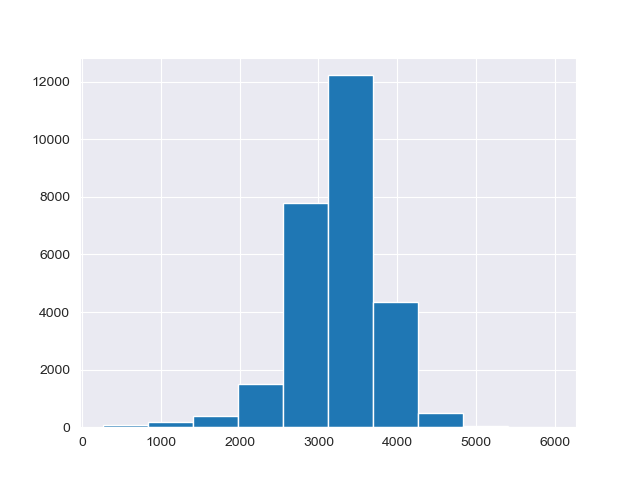

In [92]:
# Histograma com pandas
plt.figure()
df['peso'].hist()
plt.show()

<IPython.core.display.Javascript object>


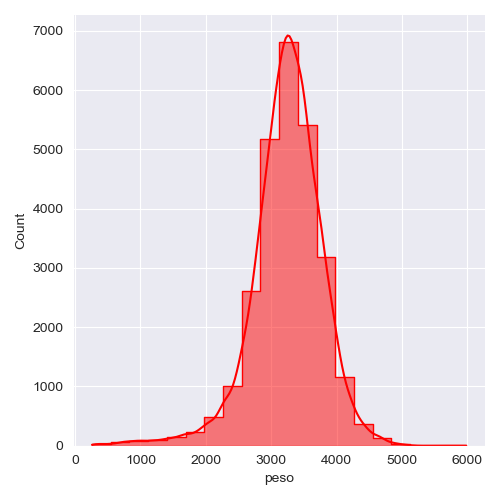

In [93]:
# Histograma com seaborn
sns.displot(data=df,
           x='peso',
           bins=20,
           alpha=.50,
           element='step',
           kde=True,
           color='red')